# MOD300: Assignment 4

**Basel Abu Sablih, Anders Bygdås and Aleksander Bø**

Date: **Nov 26, 2025**


In [ ]:
# install git package, only run once
%pip install git+https://github.com/henrysky/milkyway_plot.git

In [2]:
import matplotlib.pyplot as plt
from astropy import units as u
from mw_plot import MWSkyMap

from main import plt2rgbarr, create_sky_map

# Topic 1

# Task 1: Reproduce the image of the milky way via MWSkyMap


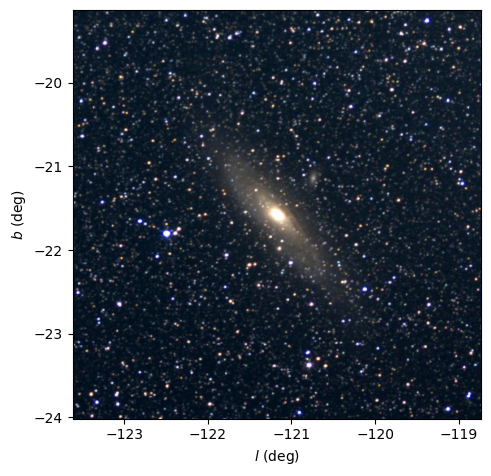

In [4]:
mw1 = MWSkyMap(
    center="M31",
    radius=(8800, 8800) * u.arcsec,
    background="Mellinger color optical survey",
)

fig, ax = plt.subplots(figsize=(5, 5))
mw1.transform(ax)
mw1.savefig('galaxy.png')
plt.show()

## Task 2: Generate multiple visualizations with different centers and radii


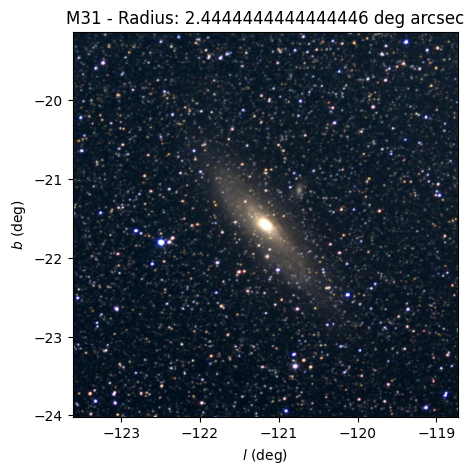

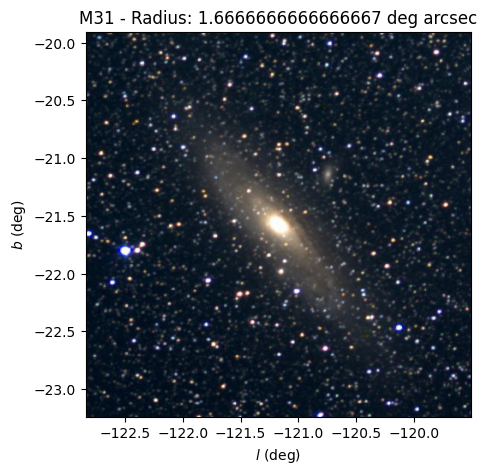

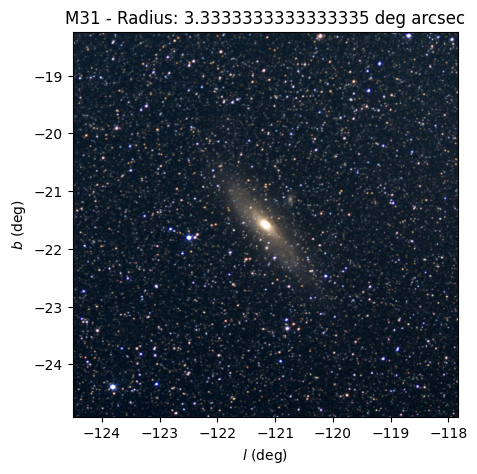

In [7]:
fig1, _ = create_sky_map("M31", (8800, 8800) * u.arcsec, "Mellinger color optical survey")
fig2, _ = create_sky_map("M31", (6000, 6000) * u.arcsec, "Mellinger color optical survey")
fig3, _ = create_sky_map("M31", (12000, 12000) * u.arcsec, "Mellinger color optical survey")



## Task 3: Convert the image to RGB np.array


In [8]:
img_array = plt2rgbarr(fig1)
print(f"Image array shape: {img_array.shape}")
print(f"Image array dtype: {img_array.dtype}")
print(f"Image array min/max values: {img_array.min()}/{img_array.max()}")
print(f"\nFirst pixel RGB values: {img_array[0, 0]}")


Image array shape: (500, 500, 3)
Image array dtype: uint8
Image array min/max values: 0/254

First pixel RGB values: [0 0 0]
